In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray
from uncertainties import unumpy as unp 

Tabelle 1:

In [18]:
md_a = pd.read_csv('tables/md_a.csv')
print(md_a.to_latex(index = False, column_format= "c c")) 


\begin{tabular}{c c}
\toprule
 Uc/V &  T/μs \\
\midrule
10.00 &     0 \\
10.00 &     3 \\
 9.00 &     4 \\
 8.00 &     7 \\
 7.00 &     9 \\
 6.00 &    13 \\
 5.00 &    18 \\
 4.00 &    23 \\
 3.50 &    26 \\
 3.00 &    30 \\
 2.50 &    33 \\
 2.00 &    40 \\
 1.50 &    47 \\
 1.00 &    57 \\
 0.50 &    80 \\
 0.25 &   128 \\
\bottomrule
\end{tabular}



a = (-0.032 +- 0.002)
b = (-0.154 +- 0.083)
RC = (31.437 +- 1.798)


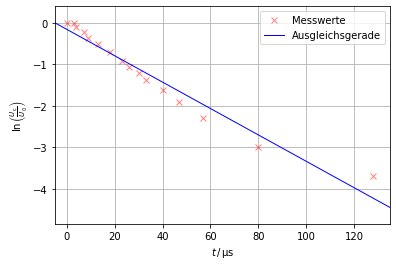

In [19]:
np.savetxt('tables/a.txt', md_a.values, header='Uc/V T/µs', fmt='%.2f')
Uc, T = np.genfromtxt('tables/a.txt', unpack=True, skip_header=1)

# lineare Ausgleichsfunktion
def f(t, a, b):
    return a * t + b

y = np.log(Uc/Uc[0])

para, pcov = curve_fit(f, T, y)
pcov = np.sqrt(np.diag(pcov))
a, b = para
fa, fb = pcov 

plt.plot(T, y, 'xr', markersize=6 , label = 'Messwerte', alpha=0.5)
xx = np.linspace(-10, 140)
plt.plot(xx, f(xx, a, b), '-b', linewidth = 1, label = 'Ausgleichsgerade')

plt.xlabel(r'$t \, / \, \mathrm{\mu s}$')
plt.ylabel(r'$\ln \left(\frac{U_\mathrm{c}}{U_{0}}\right)$')
plt.legend(loc="best")
plt.grid(True)
plt.xlim(-5, 135)

para = a, b
pcov = fa, fb
print('a = (%.3f +- %.3f)' % (a, fa))
print('b = (%.3f +- %.3f)' % (b, fb))

ua = ufloat(a, fa)
RC = -1/ua
print('RC = (%.3f +- %.3f)' % (noms(RC), stds(RC)))

Tabelle 2:

In [20]:
md_b = pd.read_csv('tables/md_bc.csv')
md_b = md_b.iloc[:, [0,1]]
print(md_b.to_latex(index = False, column_format= "c c c", decimal=',')) 

\begin{tabular}{c c c}
\toprule
  f/Hz &  Uc/V \\
\midrule
   250 & 5,000 \\
   500 & 4,800 \\
   750 & 4,600 \\
  1000 & 4,600 \\
  1250 & 4,200 \\
  1500 & 4,100 \\
  1750 & 4,000 \\
  2000 & 3,950 \\
  2250 & 3,600 \\
  2500 & 3,300 \\
  2750 & 3,200 \\
  3000 & 3,000 \\
  3250 & 2,800 \\
  3500 & 3,000 \\
  3750 & 2,800 \\
  4000 & 2,750 \\
  6000 & 2,000 \\
  8000 & 1,500 \\
 10000 & 1,200 \\
 20000 & 0,600 \\
 30000 & 0,395 \\
 50000 & 0,250 \\
100000 & 0,130 \\
\bottomrule
\end{tabular}



[-6.67344475e-05]
T = (-66.734 +- 1.219 )10^-6


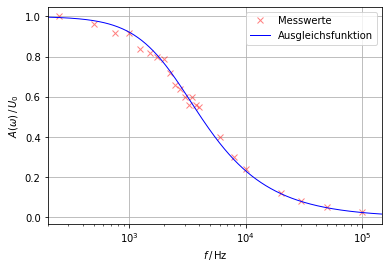

In [21]:
np.savetxt('tables/b.txt', md_b.values, header='f/Hz Uc/V', fmt='%.3f')
f, Uc = np.genfromtxt('tables/b.txt', unpack=True, skip_header=1)

Uc = Uc/Uc[0]
# Ausgleichsfunktion
def g(f, T):
    w = 2 * np.pi * f
    return 1 / (np.sqrt(1 + w**2 * T**2))

para, pcov = curve_fit(g, f, Uc)
pcov = np.sqrt(np.diag(pcov))
a = para
print(a)
fa = pcov 

plt.plot(f, Uc, 'xr', markersize=6 , label = 'Messwerte', alpha=0.5)
xx = np.linspace(100, 150000, 10**4)
plt.plot(xx, g(xx, a), '-b', linewidth = 1, label = 'Ausgleichsfunktion')

plt.xlabel(r'$f \, / \, \mathrm{Hz}$')
plt.ylabel(r'$A(\omega) \, / \, U_0$')
plt.xscale('log')
plt.legend(loc="best")
plt.grid(True)
plt.xlim(200, 150000)


ua = ufloat(a, fa) * 1e6
T = ua
print('T = (%.3f +- %.3f )10^-6' % (noms(T), stds(T)))

Tabelle 3:

In [22]:
md_c = pd.read_csv('tables/md_bc.csv')
np.savetxt('tables/c.txt', md_c.values, header='f/Hz Uc/V dt/µs', fmt='%.0f')
f, Uc, a = np.genfromtxt('tables/c.txt', unpack=True, skip_header=1)
a *= 1e-6
b = 1/f
phi = 2 * np.pi * a/b
phi = np.round(phi, 4)
z = {'f/Hz': f, 'Uc/V': Uc, 'phi/rad': phi}
dz = pd.DataFrame(data=z)
print(dz.to_latex(index = False, column_format= "c c c", decimal=','))

\begin{tabular}{c c c}
\toprule
    f/Hz &  Uc/V &  phi/rad \\
\midrule
   250,0 &   5,0 &   0,0628 \\
   500,0 &   5,0 &   0,1257 \\
   750,0 &   5,0 &   0,1885 \\
  1000,0 &   5,0 &   0,1759 \\
  1250,0 &   4,0 &   0,1649 \\
  1500,0 &   4,0 &   0,1885 \\
  1750,0 &   4,0 &   0,2199 \\
  2000,0 &   4,0 &   0,2513 \\
  2250,0 &   4,0 &   0,2827 \\
  2500,0 &   3,0 &   0,3142 \\
  2750,0 &   3,0 &   0,3283 \\
  3000,0 &   3,0 &   0,3581 \\
  3250,0 &   3,0 &   0,3676 \\
  3500,0 &   3,0 &   0,3738 \\
  3750,0 &   3,0 &   0,4006 \\
  4000,0 &   3,0 &   0,4273 \\
  6000,0 &   2,0 &   0,4524 \\
  8000,0 &   2,0 &   0,5027 \\
 10000,0 &   1,0 &   0,5027 \\
 20000,0 &   1,0 &   0,7540 \\
 30000,0 &   0,0 &   0,3770 \\
 50000,0 &   0,0 &   0,6283 \\
100000,0 &   0,0 &   0,6283 \\
\bottomrule
\end{tabular}



RC = (-4.453 +- 1.225)


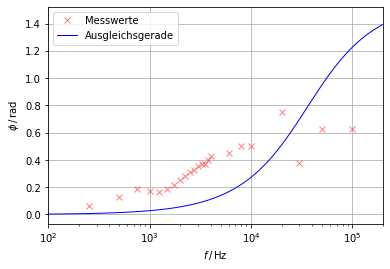

In [23]:

#  Ausgleichsfunktion
def phase(f, T):
    omega = 2 * np.pi * f
    return np.arctan(-1 * omega * T)

para, pcov = curve_fit(phase, f, phi)
pcov = np.sqrt(np.diag(pcov))
a = para
fa = pcov 

plt.plot(f, phi, 'xr', markersize=6 , label = 'Messwerte', alpha=0.5)
xx = np.linspace(100, (3)*1e5, 100000)
plt.plot(xx, phase(xx, a), '-b', linewidth = 1, label = 'Ausgleichsgerade')

plt.xlabel(r'$f \, / \, \mathrm{Hz}$')
plt.ylabel(r'$\phi \, / \, \mathrm{rad}$')
plt.legend(loc="best")
plt.xscale('log')
plt.grid(True)
plt.xlim(100, (2)*1e5)
 
ua = ufloat(a, fa) * 1e6
print('RC = (%.3f +- %.3f)' % (noms(ua), stds(ua)))

Polarplot:

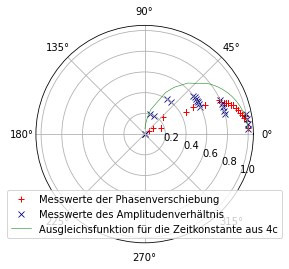

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.scatter(phi, g(f, noms(RC)*1e-6), marker='+', linewidth=1, color='r', label='Messwerte der Phasenverschiebung')
ax.scatter(phase(-1 * f, noms(RC)*1e-6), Uc/Uc[0], marker='x', color='navy', linewidth=0.8, label='Messwerte des Amplitudenverhältnis')
plt.polar(phase(-1 * f, noms(RC)*1e-6), g(f, noms(RC)*1e-6), label='Ausgleichsfunktion für die Zeitkonstante aus 4c',
        linewidth=0.5, color='green')

ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
plt.legend(loc="lower center")